<a href="https://colab.research.google.com/github/Vijaylaxmi-30/AI-recommendation-Crop-Cultivation/blob/main/AI_Based_Crop_Recommandation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI RECOMMENDATION CROP CULTIVATION

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Train Dataset.csv")
# Keep only the necessary columns
features = ['N', 'P', 'K', 'pH', 'rainfall', 'temperature']
X = df[features]
y = df['Crop']  # Target variable

print(X.shape)
print(y.unique()[:5])  # Show sample labels


(18079, 6)
['barley' 'sunflower' 'sweetpotato' 'rice' 'soyabean']


#Feature Scaling

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Scale input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Save mappings for decoding later
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
inv_label_map = {v: k for k, v in label_map.items()}


#Visualitaion

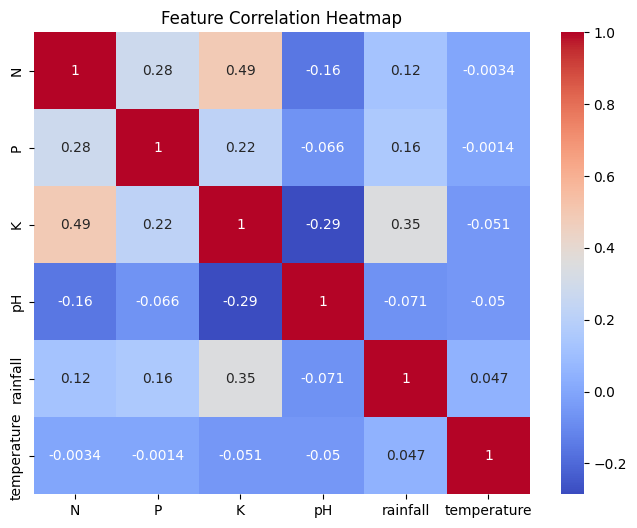

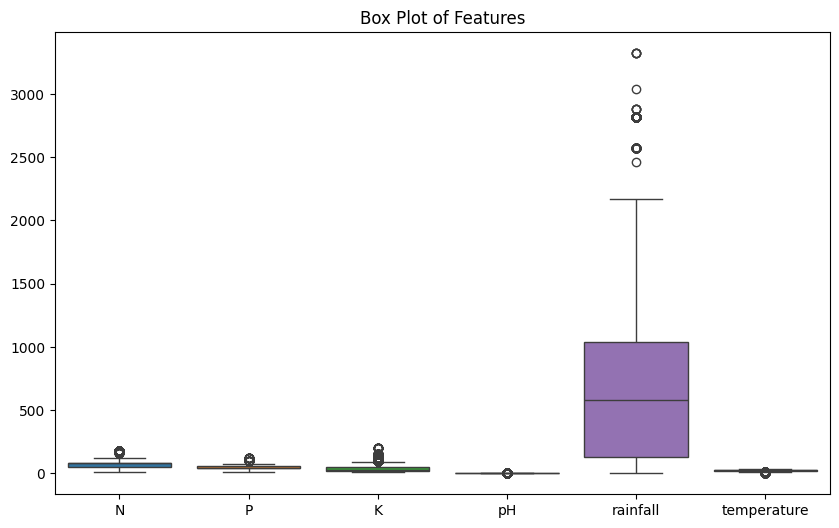

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Train Dataset.csv")

# 1. Heatmap: Correlation between numeric features
plt.figure(figsize=(8,6))
corr = df[['N', 'P', 'K', 'pH', 'rainfall', 'temperature']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 2. Box plot: Distribution of each numeric feature
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['N', 'P', 'K', 'pH', 'rainfall', 'temperature']])
plt.title('Box Plot of Features')
plt.show()




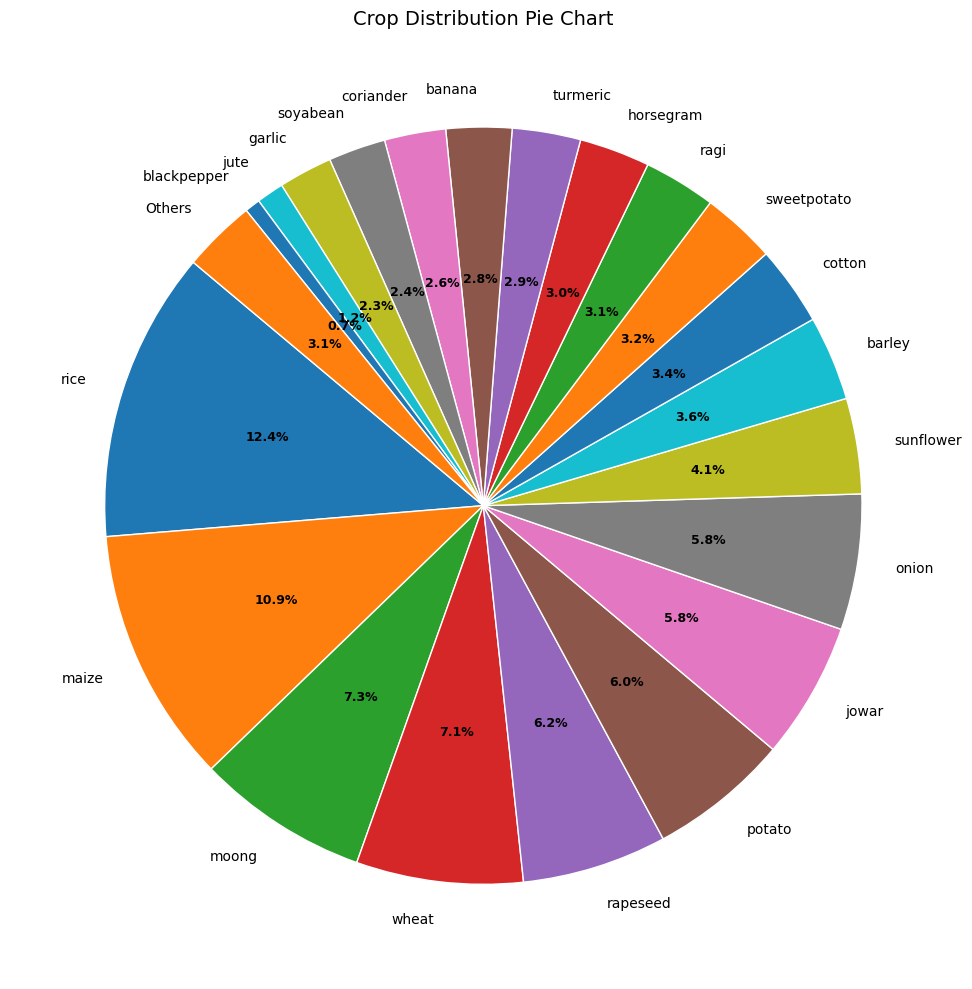

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (with 'Unnamed: 0' as index)
df = pd.read_csv("Train Dataset.csv", index_col=0)

# Count occurrences of each crop
crop_counts = df['Crop'].value_counts()

# Group small categories under "Others"
threshold = 100  # crops with <= 100 samples will be grouped
main_crops = crop_counts[crop_counts > threshold]
others_sum = crop_counts[crop_counts <= threshold].sum()

# Prepare labels and sizes for the pie chart
labels = list(main_crops.index) + ['Others']
sizes = list(main_crops.values) + [others_sum]

# Plot pie chart
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': 'white'}
)

# Styling text
plt.setp(autotexts, size=9, weight='bold')
plt.title("Crop Distribution Pie Chart", fontsize=14)
plt.tight_layout()
plt.show()

#Split & Train

#ANN


In [5]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Step 2: Load Dataset
df = pd.read_csv("Train Dataset.csv")

# Step 3: Feature and Target Selection
X = df[['N', 'P', 'K', 'pH', 'rainfall', 'temperature']]
y = df['Crop']

# Step 4: Encode Target Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Build ANN Model
model = Sequential()
model.add(Dense(64, input_shape=(6,), activation='relu'))   # Input layer
model.add(Dense(32, activation='relu'))                      # Hidden layer
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Output layer

# Step 8: Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 9: Train Model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.1)

# Step 10: Evaluate Model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\n✅ ANN Model Accuracy: {accuracy * 100:.2f}%")

# Optional: Save Model
model.save("ann_crop_prediction.keras")


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5342 - loss: 1.9729 - val_accuracy: 0.8998 - val_loss: 0.3170
Epoch 2/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9129 - loss: 0.2485 - val_accuracy: 0.9136 - val_loss: 0.2053
Epoch 3/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9242 - loss: 0.1811 - val_accuracy: 0.9157 - val_loss: 0.1787
Epoch 4/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9286 - loss: 0.1603 - val_accuracy: 0.9136 - val_loss: 0.1682
Epoch 5/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9266 - loss: 0.1575 - val_accuracy: 0.9205 - val_loss: 0.1653
Epoch 6/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9214 - loss: 0.1563 - val_accuracy: 0.9212 - val_loss: 0.1568
Epoch 7/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9267 - loss: 0.1461 - val_accuracy: 0.9212 - val_loss: 0.1554
Epoch 8/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9282 - loss: 0.1485 - val_accuracy: 0.9212 - val_

#MLP

In [6]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the dataset
df = pd.read_csv("Train Dataset.csv")

# Step 3: Select features and target
features = ['N', 'P', 'K', 'pH', 'rainfall', 'temperature']
X = df[features]
y = df['Crop']

# Step 4: Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Build MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

# Step 8: Train the model
mlp.fit(X_train_scaled, y_train)

# Step 9: Predict and evaluate
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ MLP Accuracy: {accuracy * 100:.2f}%")

# Optional: Detailed performance
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


✅ MLP Accuracy: 93.67%

Classification Report:

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        88
      barley       1.00      1.00      1.00       151
 bittergourd       1.00      1.00      1.00         2
   blackgram       1.00      1.00      1.00         2
 blackpepper       1.00      1.00      1.00        22
 bottlegourd       1.00      1.00      1.00         2
     brinjal       1.00      1.00      1.00        15
     cabbage       1.00      1.00      1.00         6
    cardamom       1.00      1.00      1.00        11
 cauliflower       1.00      1.00      1.00         3
   coriander       1.00      1.00      1.00       101
      cotton       1.00      1.00      1.00       125
    cucumber       1.00      1.00      1.00         5
   drumstick       1.00      1.00      1.00         1
      garlic       1.00      1.00      1.00        80
      grapes       1.00      1.00      1.00         7
   horsegram       1.00      1.00

#LSTM

In [7]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Step 2: Load Dataset
df = pd.read_csv("/content/Train Dataset.csv")

# Step 3: Feature & Target Selection
X = df[['N', 'P', 'K', 'pH', 'rainfall', 'temperature']]
y = df['Crop']

# Step 4: Encode Target Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Reshape for LSTM (samples, timesteps=1, features=6)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Step 8: Build LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 6)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Step 9: Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 10: Train Model
model.fit(X_train_lstm, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# Step 11: Evaluate
loss, accuracy = model.evaluate(X_test_lstm, y_test)
print(f"\n✅ LSTM Model Accuracy: {accuracy * 100:.2f}%")

# Step 12: Save Model
model.save("lstm_6features.keras")



Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4907 - loss: 2.1640 - val_accuracy: 0.8908 - val_loss: 0.3904
Epoch 2/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9068 - loss: 0.3047 - val_accuracy: 0.9039 - val_loss: 0.2305
Epoch 3/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9137 - loss: 0.2116 - val_accuracy: 0.9143 - val_loss: 0.1932
Epoch 4/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9237 - loss: 0.1777 - val_accuracy: 0.9150 - val_loss: 0.1749
Epoch 5/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9215 - loss: 0.1679 - val_accuracy: 0.9157 - val_loss: 0.1659
Epoch 6/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9252 - loss: 0.1589 - val_accuracy: 0.9157 - val_loss: 0.1628
Epoch 7/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9287 - loss: 0.1548 - val_accuracy: 0.9164 - val_loss: 0.1619
Epoch 8/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9264 - loss: 0.1501 - val_accuracy: 0.9171 - val_

#Save MLP

In [8]:
import joblib

# Save the trained MLP model
joblib.dump(mlp, "mlp_model.pkl")

# Save the StandardScaler
joblib.dump(scaler, "scaler.pkl")

# Save the LabelEncoder
joblib.dump(le, "label_encoder.pkl")

print("✅ MLP model, scaler, and label encoder saved successfully.")


✅ MLP model, scaler, and label encoder saved successfully.


#Comaparision

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv("Train Dataset.csv")
X = df[['N', 'P', 'K', 'pH', 'rainfall', 'temperature']]
y = df['Crop']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train_cat = to_categorical(y_train)
X_test_cat = to_categorical(y_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===== ANN Model =====
ann = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_encoded)), activation='softmax')
])
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train_scaled, X_train_cat, epochs=50, batch_size=16, verbose=0)
ann_acc = ann.evaluate(X_test_scaled, X_test_cat, verbose=0)[1]

# ===== MLP Model (sklearn) =====
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp_pred = mlp.predict(X_test_scaled)
mlp_acc = accuracy_score(y_test, mlp_pred)

# ===== LSTM Model =====
X_train_seq = X_train_scaled.reshape((X_train_scaled.shape[0], 1, 6))
X_test_seq = X_test_scaled.reshape((X_test_scaled.shape[0], 1, 6))
lstm = Sequential([
    LSTM(64, input_shape=(1, 6)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_encoded)), activation='softmax')
])
lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm.fit(X_train_seq, X_train_cat, epochs=50, batch_size=16, verbose=0)
lstm_acc = lstm.evaluate(X_test_seq, X_test_cat, verbose=0)[1]

# ===== BiLSTM Model =====
bilstm = Sequential([
    Bidirectional(LSTM(64), input_shape=(1, 6)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_encoded)), activation='softmax')
])
bilstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
bilstm.fit(X_train_seq, X_train_cat, epochs=50, batch_size=16, verbose=0)
bilstm_acc = bilstm.evaluate(X_test_seq, X_test_cat, verbose=0)[1]

# ===== Plot Comparison =====
models = ['ANN', 'MLP', 'LSTM', 'BiLSTM']
accuracies = [ann_acc, mlp_acc, lstm_acc, bilstm_acc]

plt.figure(figsize=(8, 5))
plt.bar(models, [a * 100 for a in accuracies], color=['skyblue', 'lightgreen', 'orange', 'purple'])
plt.ylabel('Accuracy (%)')
plt.title('Crop Prediction Model Accuracy Comparison')
plt.ylim(80, 100)
plt.grid(axis='y')
plt.show()

# Print accuracy values
for model_name, acc in zip(models, accuracies):
    print(f"{model_name} Accuracy: {acc * 100:.2f}%")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
